<a href="https://colab.research.google.com/github/BrothaaEww/US-Airlines-Sentiment-Analysis/blob/main/Airlines_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# tweets = pd.read_csv("/content/drive/MyDrive/Airlines.csv")
tweets = pd.read_csv("/content/drive/MyDrive/Projects_and_Research_Papers/Book_Chapter(US_Election & Airlines)/Airlines_Tweet_Data.csv")
print(tweets)
tweets.head()

           tweet_id airline_sentiment  airline_sentiment_confidence  \
0      5.703060e+17           neutral                        1.0000   
1      5.703010e+17          positive                        0.3486   
2      5.703010e+17           neutral                        0.6837   
3      5.703010e+17          negative                        1.0000   
4      5.703010e+17          negative                        1.0000   
...             ...               ...                           ...   
14635  5.695880e+17          positive                        0.3487   
14636  5.695870e+17          negative                        1.0000   
14637  5.695870e+17           neutral                        1.0000   
14638  5.695870e+17          negative                        1.0000   
14639  5.695870e+17           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin Americ

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


<AxesSubplot:ylabel='airline'>

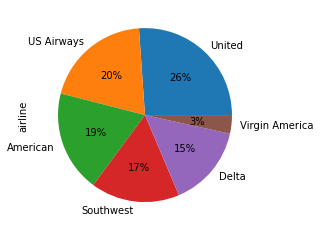

In [ ]:
tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

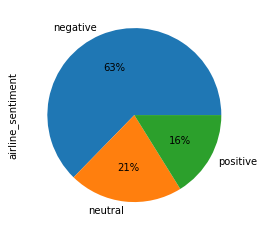

In [ ]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:xlabel='airline'>

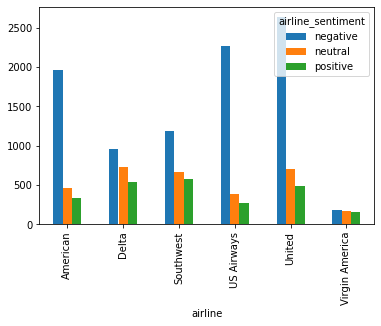

In [ ]:
sentiment = tweets.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

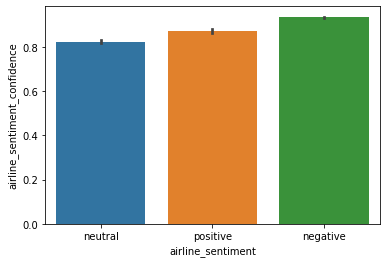

In [ ]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=tweets)

In [ ]:
pip install tensorflow

In [ ]:
# MODEL CREATION

import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error


# tweets = pd.read_csv("/content/drive/MyDrive/Tweets.csv")
tweets = pd.read_csv("/content/drive/MyDrive/Airlines.csv")
# tweets = pd.read_csv("/content/drive/MyDrive/Projects_and_Research_Papers/Book_Chapter(US_Election & Airlines)/Airlines_Tweet_Data.csv")

tweets.head()

features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

features_pp = []
for i in range(0, len(features)):
    feature_pp = re.sub(r'\W', ' ', str(features[i]))
    feature_pp = re.sub(r'\s+[a-zA-Z]\s+', ' ', feature_pp)
    feature_pp = re.sub(r'\^[a-zA-Z]\s+', ' ', feature_pp)
    feature_pp = re.sub(r'\s+', ' ', feature_pp, flags=re.I)
    feature_pp = re.sub(r'^b\s+', '', feature_pp)
    feature_pp = feature_pp.lower()
    features_pp.append(feature_pp)
# print(features_pp)

vectorizer = TfidfVectorizer(max_features=2500,
    min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
features_pp = vectorizer.fit_transform(features_pp).toarray()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_pp, labels, test_size=0.2, random_state=0)

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=200, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)


Confusion Matrix
[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]

Classification Report
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928


Accuracy
75.99043715846994 %


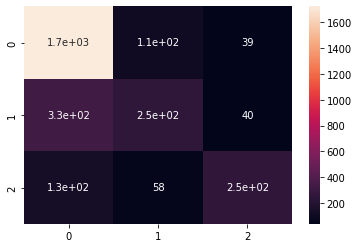

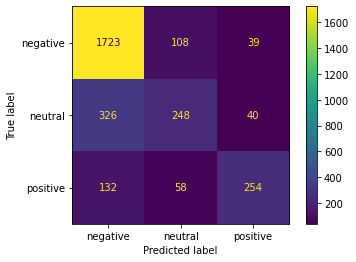

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier_rf.predict(X_test)

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, predictions)
print(cm)

sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

print("\nClassification Report")
print(classification_report(y_test, predictions))

print("\nAccuracy")
print(accuracy_score(y_test, predictions)*100, '%')

ConfusionMatrixDisplay.from_estimator(classifier_rf, X_test, y_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_rf.classes_)
# disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
predictionsxgboost = [value for value in y_pred]

accuracy = accuracy_score(y_test, predictionsxgboost)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.22%


In [ ]:
#decission tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training
clf_gini.fit(X_train, y_train)

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  73.224043715847


In [ ]:
#multilayer perceptron

from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

In [ ]:
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy : %.2f%%" % (accuracy_score(y_test,ypred)*100.0))

Accuracy : 72.51%


In [ ]:
# xgbosst
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify = labels)

model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# make predictions for test data
y_pred = model.predict(X_test)
predictionsxgboost = [value for value in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [ ]:
from PIL import Image
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

unmeaningful = ['i', 'you', 'me', 'to', 'the', 'a', 'my', 'is', 'in', 'and', 'for', 'on', 'of',
                'your', 'so', 'was', 'have', 'it', 'at', 'with', 'that', 'from', 'do', 'get',
                'but', 'this', 'can', 'just', 'they', 'we', 'are', 'an', 'be', "i'm", 'will',
                'if', 'had', 'our', 'about', 'there', 'has', 'been', '-', 'by', 'like', 'or',
                'as', 'he', 'she', 'it', 'us', 'has' ,"i've", "it's", "don't", 'would', 'am',
               'flight', 'customer', 'any', 'very', "didn't", "you've", 'thing', 'take',
               'other', 'u', '', ' ']

def clean_text(str_in):
    res = ""
    str_in = str_in.lower()
    str_arr = str_in.split(' ')
    for word in str_arr:
        # make all words into lower case
        word = word.lower()
        # remove not useful words from the original text
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in unmeaningful:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res

tweets["text"] = tweets["text"].apply(clean_text)
sentiments = tweets['airline_sentiment'].unique()

total_negative = tweets[tweets['airline_sentiment'] == 'negative']['airline_sentiment_confidence'].sum()
total_positive = tweets[tweets['airline_sentiment'] == 'positive']['airline_sentiment_confidence'].sum()
total_neutral = tweets[tweets['airline_sentiment'] == 'neutral']['airline_sentiment_confidence'].sum()

values = [total_neutral, total_positive, total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values}

dfSentimentCount = pd.DataFrame(dictionary1)
# dfSentimentCount.head(3)



In [ ]:
listOfAirlines = tweets['airline'].unique()

neutralCount = []
positiveCount = []
negativeCount = []
totalCount = []

for airline in listOfAirlines:
    neuC = tweets.query("airline == @airline and airline_sentiment == 'neutral'")['airline_sentiment_confidence'].sum()
    posC = tweets.query("airline == @airline and airline_sentiment == 'positive'")['airline_sentiment_confidence'].sum()
    negC = tweets.query("airline == @airline and airline_sentiment == 'negative'")['airline_sentiment_confidence'].sum()
    tot = neuC + posC + negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(tot)

df2 = pd.DataFrame(index=listOfAirlines);
df2['Neutral Count'] = neutralCount
df2['Positive Count'] = positiveCount
df2['Negative Count'] = negativeCount
print(df2)

                Neutral Count  Positive Count  Negative Count
Virgin America       143.3610        134.9727        163.2137
United               564.4000        421.1578       2457.5967
Southwest            548.5365        505.0800       1091.7521
Delta                599.5580        471.7084        861.6031
US Airways           313.1524        231.2555       2140.1501
American             382.4092        296.4536       1852.1112


In [ ]:
percentNeg = []
for neg, tot in zip(negativeCount, totalCount):
    perc = neg/tot
    percentNeg.append(perc)

df3 = pd.DataFrame(index=listOfAirlines)
df3['Negative Feedback %'] = percentNeg
print(df3)

                Negative Feedback %
Virgin America             0.369640
United                     0.713763
Southwest                  0.508888
Delta                      0.445764
US Airways                 0.797208
American                   0.731778


In [ ]:
negative_text = tweets[tweets['airline_sentiment'] == 'negative']['text']
neutral_text = tweets[tweets['airline_sentiment'] == 'neutral']['text']
positive_text = tweets[tweets['airline_sentiment'] == 'positive']['text']

def count_words(texts):
    result = {}
    for text in texts:
        text_arr = text.split(' ')
        for word in text_arr:
            # exclude empty string
            if word == '':
                continue
            # increase the frequency count in the returning dict
            if word in result:
                count = result[word]
                result[word] = count + 1
            else:
                result[word] = 1
    return result

negative_dict = count_words(negative_text)
neutral_dict = count_words(neutral_text)
positive_dict = count_words(positive_text)

sorted_negative_dict = sorted(negative_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_neutral_dict = sorted(neutral_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_positive_dict = sorted(positive_dict.items(), key=operator.itemgetter(1), reverse=True)

negative_df = pd.DataFrame(sorted_negative_dict, columns=['Word', 'Frequency'])
neutral_df = pd.DataFrame(sorted_neutral_dict, columns=['Word', 'Frequency'])
positive_df = pd.DataFrame(sorted_positive_dict, columns=['Word', 'Frequency'])


In [ ]:
print("Wordcloud for Word Frequency from all Negative Feedback")

negative_wordcloud = WordCloud(background_color="white", width=800, height=400)
negative_wordcloud.generate_from_frequencies(negative_dict)
plt.figure(figsize=(15,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print("Wordcloud for Word Frequency from all Neutral Feedback")

neutral_wordcloud = WordCloud(background_color="white", width=800, height=400)
neutral_wordcloud.generate_from_frequencies(neutral_dict)
plt.figure(figsize=(15,10))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print("Wordcloud for Word Frequency from all Positive Feedback")

positive_wordcloud = WordCloud(background_color="white", width=800, height=400)
positive_wordcloud.generate_from_frequencies(positive_dict)
plt.figure(figsize=(15,10))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X_train = tweets.loc[:11711, 'text'].values
Y_train = tweets.loc[:11711, 'airline_sentiment'].values
X_test1 = tweets.loc[11712:, 'text'].values
Y_test1= tweets.loc[11712:, 'airline_sentiment'].values

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test1)

# print("The shape of train vector is", train_vectors.shape)
# print("The shape of test vector is", test_vectors.shape)

svc = svm.SVC()
clf = svc.fit(train_vectors, Y_train)

predicted = clf.predict(test_vectors)
print("Predicted result:", predicted)
print("Accuracy score from linear SVC model:", accuracy_score(Y_test1, predicted)*100)

nb = MultinomialNB()
clf2 = nb.fit(train_vectors, Y_train)

predicted2 = clf2.predict(test_vectors)
print("Predicted result:", predicted2)
print("Accuracy score from Naive Bayes model:", accuracy_score(Y_test1, predicted2)*100)

# cm = confusion_matrix(y_test, predictions)
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# plt.show()

Predicted result: ['negative' 'negative' 'positive' ... 'neutral' 'negative' 'negative']
Accuracy score from linear SVC model: 81.5915300546448
Predicted result: ['negative' 'negative' 'neutral' ... 'negative' 'negative' 'negative']
Accuracy score from Naive Bayes model: 75.06830601092896


In [ ]:
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = classifier_rf.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

print("\nClassification Report")
print(classification_report(y_test, predictions))

print("\nAccuracy")
print(accuracy_score(y_test, predictions)*100, '%')

In [ ]:
import pickle

pickle.dump(classifier_rf, open('classifier_rf.sav', 'wb'))

In [ ]:
modelFile = 'classifier_rf.sav'

model = pickle.load(open(modelFile, 'rb'))
print('Model loaded:', model.score(X_test, y_test)*100, '% accuracy')